In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [136]:
def read_aqua(file):
    
    aqua = pd.read_csv(file, sep='\t')
    aqua['datetime']=pd.to_datetime(aqua.timestamp, format = '%Y/%m/%d %H:%M:%S')
    aqua['doy'] = aqua.datetime.dt.dayofyear + aqua.datetime.dt.hour/24
    aqua.sort_values(by='doy', inplace=True)

    return aqua

In [137]:
file = 'amigos3a_cavity_aqd22 copy.txt'
aqd22 = read_aqua(file)
file = 'amigos3a_cavity_aqd24 copy.txt'
aqd24 = read_aqua(file)
file = 'amigos3c_channel_aqd23 copy.txt'
aqd23 = read_aqua(file)
file = 'amigos3c_channel_aqd25 copy.txt'
aqd25 = read_aqua(file)

In [386]:
aqd22

,timestamp,station,device_id,east_vel,north_vel,up_vel,pitch,pressure,temperature,speed,direction,datetime,doy
5244,2021/1/1 0:00:00,AMIGOS3A,22.0,0.019,-0.014,0.003,0.1,516.46,0.40,0.023601,126.4,2021-01-01 00:00:00,1.000000
5245,2021/1/1 1:00:00,AMIGOS3A,22.0,0.026,-0.016,0.002,0.0,516.45,0.40,0.030529,121.6,2021-01-01 01:00:00,1.041667
5246,2021/1/1 2:00:00,AMIGOS3A,22.0,0.020,-0.017,0.002,0.0,516.44,0.40,0.026249,130.4,2021-01-01 02:00:00,1.083333
5247,2021/1/1 3:00:00,AMIGOS3A,22.0,0.027,-0.027,-0.007,0.0,516.45,0.40,0.038184,135.0,2021-01-01 03:00:00,1.125000
5248,2021/1/1 4:00:00,AMIGOS3A,22.0,0.023,-0.031,-0.007,0.0,516.44,0.40,0.038601,143.4,2021-01-01 04:00:00,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,2020/12/31 19:00:00,AMIGOS3A,22.0,0.030,-0.001,0.004,0.1,516.45,0.36,0.030017,91.9,2020-12-31 19:00:00,366.791667
5240,2020/12/31 20:00:00,AMIGOS3A,22.0,0.018,0.000,0.001,0.1,516.46,0.36,0.018000,90.0,2020-12-31 20:00:00,366.833333
5241,2020/12/31 21:00:00,AMIGOS3A,22.0,0.027,-0.005,0.010,0.1,516.45,0.36,0.027459,100.5,2020-12-31 21:00:00,366.875000
5242,2020/12/31 22:00:00,AMIGOS3A,22.0,0.029,-0.005,0.001,0.1,516.45,0.38,0.029428,99.8,2020-12-31 22:00:00,366.916667


In [387]:
def plot_parameter(instr,par_list,first,last):
    
    # this will plot any parameters provided in a list for a given instrument
    # possible parameters are north_vel, east_vel, up_vel, pitch, pressure, temperature, speed, direction
    # first and last defines a time interval in days
    
    
    if instr=='Cavity mid':
        aqd = aqd22
    elif instr=='Channel mid':
        aqd = aqd23
    elif instr=='Cavity deep':
        aqd = aqd24
    elif instr=='Channel deep':
        aqd = aqd25
    else:
        print('This aquadopp does not exist')
    
    plt.figure(figsize=(20,9))
    for par in par_list:
        plt.plot(aqd.doy[aqd.doy.between(first,last)], aqd[par][aqd.doy.between(first,last)], label=par)
        
    plt.legend(fontsize=16)
    plt.xlabel('DOY 2020', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

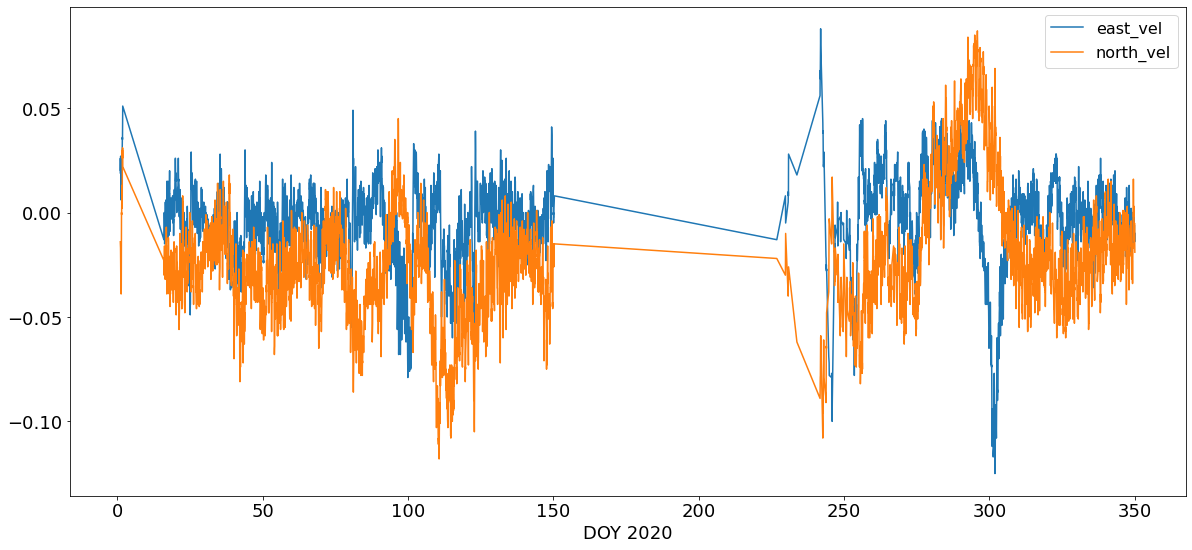

In [388]:
plot_parameter('Cavity mid',['east_vel','north_vel'],0,350)

In [7]:
# tide model
# this is the CATS 2008 model 

tide = pd.read_csv('atide_model_cats2008.out', header=None, sep='\s+', skiprows=6, names=['date', 
                                                                                      'time', 'z'])
tide['datetime']=pd.to_datetime(tide[['date', 'time']].astype(str).apply(' '.join,1), 
                                format = '%d-%b-%Y %H:%M:%S')
tide['doy'] = tide.datetime.dt.dayofyear + (tide.datetime.dt.hour + tide.datetime.dt.minute/60)/24


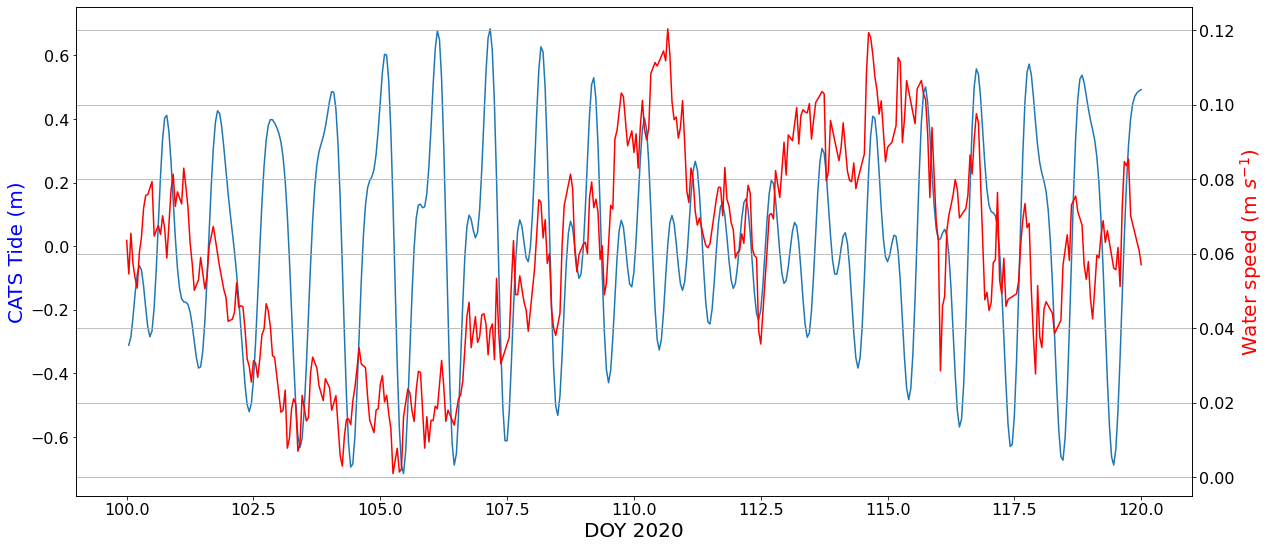

In [389]:
# Comparison of measured speed and predicted tide (vertical)

# time interval 
first = 100
last = 120

# specify the aquadopp (22 is mid-cavity, 24 deep cavity, 23 mid channel, 25 deep channel)
aqd = aqd22

aqd.speed = np.sqrt(aqd.north_vel**2+aqd.east_vel**2)
fig, ax1 = plt.subplots(figsize=(20,9))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

ax1.plot(tide.doy[tide.doy.between(first,last)],tide.z[tide.doy.between(first,last)])
ax2 = ax1.twinx()
ax2.plot(aqd.doy[aqd.doy.between(first,last)],aqd.speed[aqd.doy.between(first,last)],'r')

plt.yticks(fontsize=16) 
ax1.set_xlabel('DOY 2020', fontsize=20)
ax1.set_ylabel('CATS Tide (m)', fontsize=20, color='b')
ax2.set_ylabel('Water speed (m $s^{-1}$)', fontsize=20, color='r')
ax2.grid()


In [392]:
# print out the mean flow between first and last day for all Aquadopps

first = 5
last = 350

print('Cavity mid-level: Mean East : ' + "{:4.4f}".format(np.mean(aqd22.east_vel[aqd22.doy.between(first,last)])) + ' m/s')
print('Cavity mid-level: Mean North: ' + "{:4.4f}".format(np.mean(aqd22.north_vel[aqd22.doy.between(first,last)])) + ' m/s')
print()

print('Cavity deep: Mean East : ' + "{:4.4f}".format(np.mean(aqd24.east_vel[aqd24.doy.between(first,last)])) + ' m/s')
print('Cavity deep: Mean North: ' + "{:4.4f}".format(np.mean(aqd24.north_vel[aqd24.doy.between(first,last)])) + ' m/s')
print()
print('Channel mid-level: Mean East : ' + "{:4.4f}".format(np.mean(aqd23.east_vel[aqd23.doy.between(first,last)])) + ' m/s')
print('Channel mid-level: Mean North: ' + "{:4.4f}".format(np.mean(aqd23.north_vel[aqd23.doy.between(first,last)])) + ' m/s')
print()
print('Channel deep: Mean East : ' + "{:4.4f}".format(np.mean(aqd25.east_vel[aqd25.doy.between(first,last)])) + ' m/s')
print('Channel deep: Mean North: ' + "{:4.4f}".format(np.mean(aqd25.north_vel[aqd25.doy.between(first,last)])) + ' m/s')
print()

Cavity mid-level: Mean East : -0.0046 m/s
Cavity mid-level: Mean North: -0.0227 m/s

Cavity deep: Mean East : 0.0007 m/s
Cavity deep: Mean North: -0.0038 m/s

Channel mid-level: Mean East : 0.0009 m/s
Channel mid-level: Mean North: -0.0073 m/s

Channel deep: Mean East : -0.0003 m/s
Channel deep: Mean North: 0.0004 m/s



In [393]:
# this defines a windrose plot
# aqd is the dataframe of the Aquadopp, first and last define the time interval, and step is an averaging length

def windrose(aqd, first, last, step):
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, aspect='equal')
    
    east = []
    north = []
    time = []
    for day in np.arange(first,last,step):
        east.append(np.mean(aqd.east_vel[aqd.doy.between(day,day+step)]))
        north.append(np.mean(aqd.north_vel[aqd.doy.between(day,day+step)]))
        time.append(day+step/2)
        
    prange = 0.04
    x = np.zeros(np.size(east))
    y = np.zeros(np.size(east))
    qv = ax.quiver(x,y,east,north, time, scale=1, angles='xy', scale_units='xy')
    circle1 = plt.Circle((0, 0), 0.01, color='k', fill=False)
    circle2 = plt.Circle((0, 0), 0.02, color='k', fill=False)
    circle3 = plt.Circle((0, 0), 0.03, color='k', fill=False)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    
    ax.plot([-0.03,0.03],[0,0], 'k:')
    ax.plot([0,0],[-0.03,0.03], 'k:')
    plt.text(0.01,0.002,'1 cm s$^{-1}$', fontsize=16)
    plt.text(0.02,0.004,'2 cm s$^{-1}$', fontsize=16)
    
    plt.axis('off')
    cbar=fig.colorbar(qv, orientation='vertical')
    cbar.set_label('DOY', fontsize=21, labelpad=-2)
    
    cbar.ax.tick_params(labelsize=20)
    
    sens = int(aqd.device_id[0])
    if sens==22: 
        title='Cavity mid-level'
    elif sens==23: 
        title='Channel mid-level'
    elif sens==24: 
        title='Cavity deep'
    if sens==25: 
        title='Channel deep'
    
    ftitle = title + ', $\Delta t = $' + str(step) + ' days'
    
    plt.title(ftitle, fontsize=24)
    fname = title+'.eps'
    plt.savefig(fname)

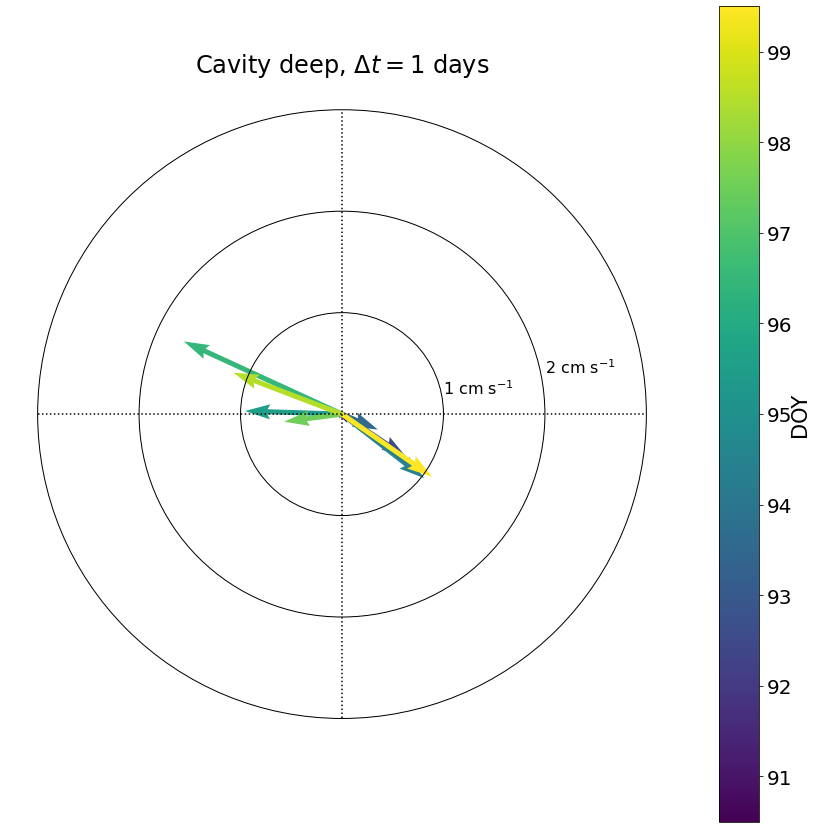

In [395]:
# Cavity: 22 and 24; Channel: 23 and 25

windrose(aqd24,90,100,1)

-----------------------------------
nobs = 480 
ngood = 479 
record length (days) = 20.00
rayleigh criterion = 1.0

Phases at central time
x0= -0.000206  xtrend= 0
var(data)= 0.00    var(prediction)= 0.00    var(residual)= 0.00
var(prediction)/var(data) (%) = 11.2

y0= -0.0189  ytrend= 0
var(data)= 0.00    var(prediction)= 0.00    var(residual)= 0.00
var(prediction)/var(data) (%) = 57.2

total_var= 0.000440 pred_var=  0.000196
total_var/pred_var (%) =  44.5  
                                ellipse parameters with 95 % CI estimates
 tide     freq        major      emaj      minor      emin     inc      einc      pha       epha      snr
* MSF   0.0028219     0.0151     0.008    0.0014     0.008    96.40     32.68    182.75     31.69      3.5
* O1    0.0387307     0.0068     0.003   -0.0000     0.003   119.47     30.20    241.97     20.67        6
* K1    0.0417807     0.0072     0.002    0.0014     0.003    99.56     31.36    124.27     19.68       12
* M2    0.0805114     0.0027     0.

Text(0, 0.5, 'Speed (m/s)')

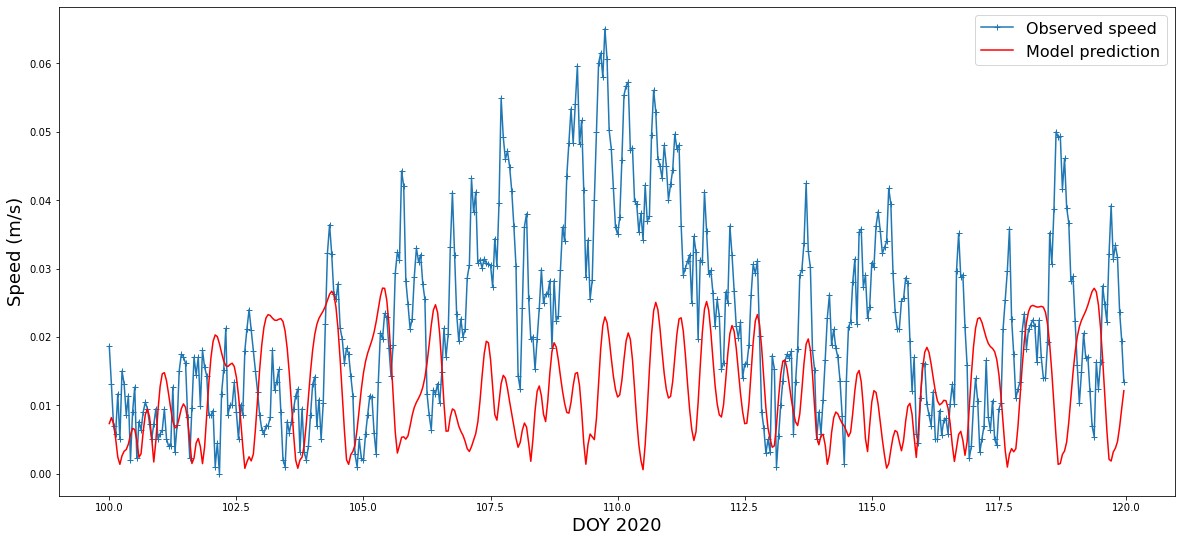

In [399]:
# this is an effort to do some tidal analysis using the t-tide package
# the program uses the capability of fitting flow components by treating them as complex values: east + i*north
# the output is a SNR for each tidal component; the ones that are statistically significant are marked with an *


import ttide as tt

first = 100
last = 120

# Cavity: 22 and 24; Channel: 23 and 25

aqd = aqd25

east = aqd.east_vel[aqd.doy.between(first,last)].to_numpy()
north = aqd.north_vel[aqd.doy.between(first,last)].to_numpy()
xin = east + 1j * north
speed = np.sqrt((aqd.east_vel[aqd.doy.between(first,last)].to_numpy())**2 + (aqd.north_vel[aqd.doy.between(first,last)].to_numpy())**2)
t_d = aqd.doy[aqd.doy.between(first,last)].to_numpy()

# the Aquadopp has missing data, this does an interpolation to regularly gridded data. t_tide expects hourly by default

ti = np.arange(t_d[0], t_d[-1], 1/24)
s_i = np.interp(ti,t_d,speed)
e_i = np.interp(ti,t_d,east)
n_i = np.interp(ti,t_d,north)
#tfit_e = tt.t_tide(xin, constitnames=['M2'])
#tfit_e = tt.t_tide(s_i)
tfit_e = tt.t_tide(e_i + 1j*n_i)
plt.figure(figsize=(20,9))
plt.plot(ti,s_i,'-+', label='Observed speed')
elev_fit = tfit_e(ti-ti[0])
plt.plot(ti,np.absolute(elev_fit),'r', label='Model prediction')

# this plots the difference between predicted and observed
#plt.plot(ti,s_i-np.absolute(elev_fit),'g', label='Model difference')

plt.legend(fontsize=16)
plt.xlabel('DOY 2020', fontsize=18)
plt.ylabel('Speed (m/s)', fontsize=18)

In [400]:
# this is a look at which tidal component is dominant (a sort of tidal spectrogram). It analyses the record between the days given by 'first' and 'last'
# the tidal analysis is run over a time span of 'interval' days. 'overlap' defines a fractional overlap between adjacent intervals

first = 20
last = 350
interval = 17
overlap = 0.95

# Cavity: 22 and 24; Channel: 23 and 25
aqd = aqd23

# other components can be added here as needed
K1 = []
M2 = []
M3 = []
t = []

for start in np.arange(first,last,(1-overlap)*interval):
    if aqd.doy[aqd.doy.between(start,start+interval)].shape[0]>interval*.9:   # this filters for large data gaps
        east = aqd.east_vel[aqd.doy.between(start,start+interval)].to_numpy()
        north = aqd.north_vel[aqd.doy.between(start,start+interval)].to_numpy()
        xin = east + 1j * north
        t_d = aqd.doy[aqd.doy.between(start,start+interval)].to_numpy()
    
        ti = np.arange(t_d[0], t_d[-1], 1/24)
        e_i = np.interp(ti,t_d,east)
        n_i = np.interp(ti,t_d,north)
    
        tfit_e = tt.t_tide(e_i + 1j*n_i, out_style=None)
    
        #snr = np.append(snr,[tfit_e['snr']],axis=0)
        K1.append(tfit_e['snr'][tfit_e['nameu']==b'K1  '])
        M2.append(tfit_e['snr'][tfit_e['nameu']==b'M2  '])
        M3.append(tfit_e['snr'][tfit_e['nameu']==b'M3  '])
        t.append(0.5*(t_d[0]+t_d[-1]))

    

    

No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR
No predictions with this SNR


Text(0, 0.5, 'SNR')

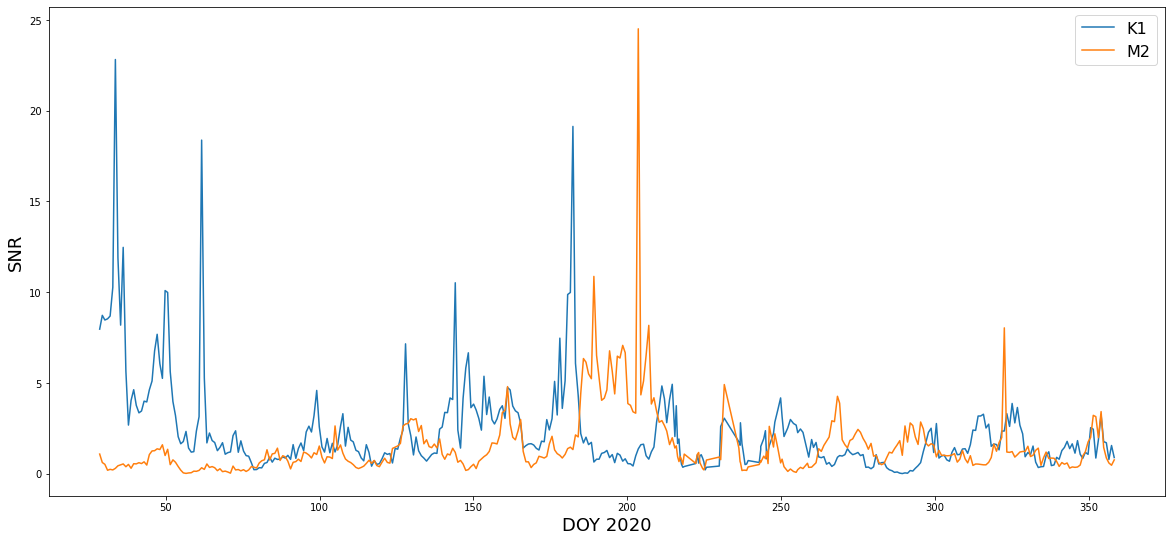

In [402]:
plt.figure(figsize=(20,9))
plt.plot(t,K1,label='K1')
plt.plot(t,M2,label='M2')
#plt.plot(np.arange(first,last,interval),M3,label='M3')
plt.legend(fontsize=16)
plt.xlabel('DOY 2020', fontsize=18)
plt.ylabel('SNR',fontsize=18)


In [403]:
# these two functions are probably unnecessary, since they are already reported in the data file

def direction(north,east):
    direc=-np.arctan2(north,east)*180/np.pi+90
    direc[direc>180] -= 360
    return direc

def speed(north,east):
    return np.sqrt(east**2+north**2)

# the point of this function is to show direction and speed on the same graph. That is generally too noisy, but a scatter plot looks more interesting

def plot_dir_speed(instr, first, last):
    
    fig, ax1 = plt.subplots(figsize=(20,9))
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16) 
    
    if instr=='Cavity mid':
        aqd = aqd22
    elif instr=='Channel mid':
        aqd = aqd23
    elif instr=='Cavity deep':
        aqd = aqd24
    elif instr=='Channel deep':
        aqd = aqd25
    else:
        print('This aquadopp does not exist')
            
    aqd.speed = speed(aqd.north_vel,aqd.east_vel)
    aqd.dir = direction(aqd.north_vel,aqd.east_vel)
        
    ax1.plot(aqd.doy[aqd.doy.between(first,last)],aqd.dir[aqd.doy.between(first,last)],'r',label=instr+' Dir')
    ax2 = ax1.twinx()
    ax2.plot(aqd.doy[aqd.doy.between(first,last)],aqd.speed[aqd.doy.between(first,last)],'b',label=instr+' Speed')

    plt.yticks(fontsize=16) 
    ax1.set_xlabel('DOY 2020', fontsize=20)
    ax1.set_ylabel('Direction (clockwise from N)', fontsize=20, color='r')
    ax2.set_ylabel('Speed (m $s^{-1}$)', fontsize=20, color='b')
    ax2.grid()
    
    plt.figure(figsize=(15,10))
    plt.scatter(aqd.speed[aqd.doy.between(first,last)],aqd.dir[aqd.doy.between(first,last)],10,aqd.doy[aqd.doy.between(first,last)])
    plt.xlabel('Speed (m $s^{-1}$)', fontsize=20)
    plt.ylabel('Direction (clockwise from N)', fontsize=20)
    plt.xticks(fontsize=16) 
    plt.yticks(fontsize=16) 
    plt.title(instr + ':  Day ' + str(first) + ' to Day ' + str(last), fontsize=20)
    cb_h = plt.colorbar()
    cb_h.set_label(label='DOY', fontsize=16)
    cb_h.ax.tick_params(labelsize=16)

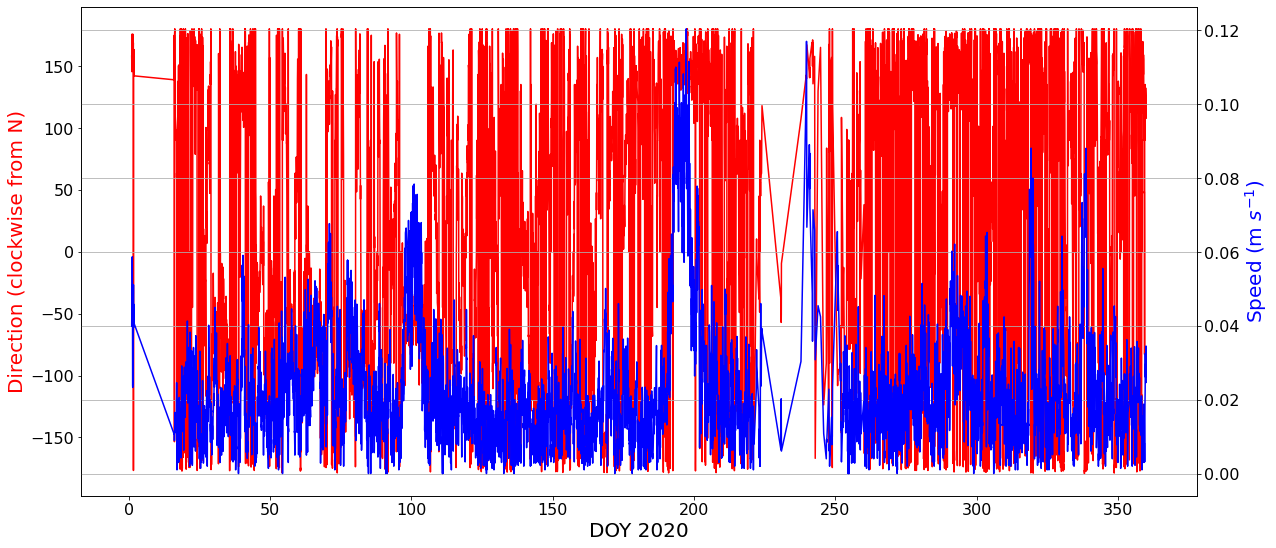

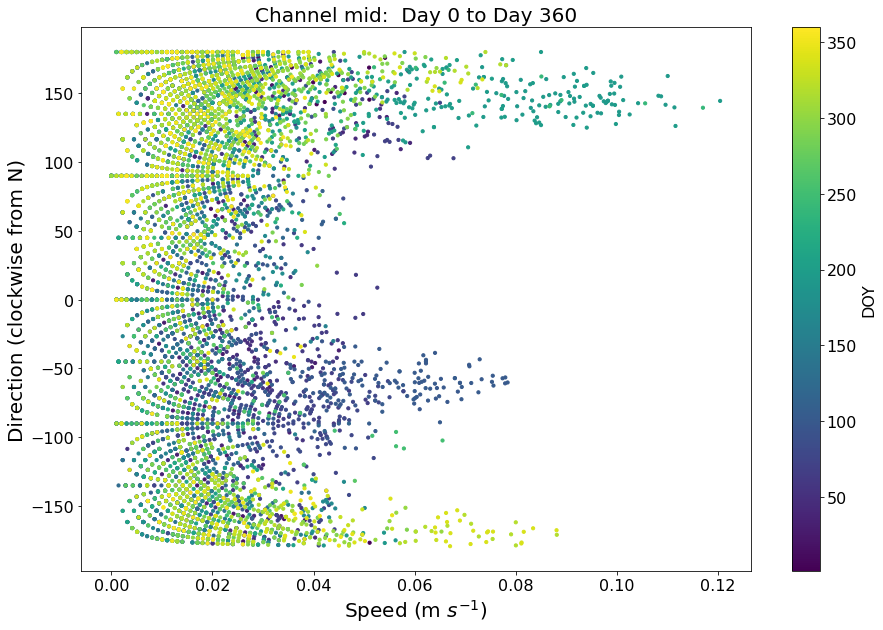

In [405]:
# you can use the strings 'Channel mid', 'Channel deep', 'Cavity mid' and 'Cavity deep' as arguments
# the other two arguments are first and last day

plot_dir_speed('Channel mid',0,360)

AttributeError: module 'mpl_toolkits' has no attribute '__version__'